# Group Discussion Machine Learning II

### Overview
1. Build a churn prediction model (any technique is fine) and show the performance of the model in forms of confusion matrix / ROC Curve / Precision vs Recall with the proper ML workflow.
2. Why do you choose this model over other techniques?
3. If you have time to improve the model, how would you do so?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

## Preview of the dataset

In [2]:
df = pd.read_csv('Classification/Practice dataset ML II.csv')

In [3]:
df.shape

(7043, 22)

In [4]:
pd.set_option('display.max_columns', 100)
df.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [6]:
df.select_dtypes(['integer', 'float']).describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.select_dtypes('object').describe()

,customerID,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5550-VFRLC,Germany,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,6761,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Data Preparation and Feature Engineering

In [8]:
# TotalCharges column should be float type, not object type
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
1145.7      1
1347.15     1
3440.25     1
733.35      1
2555.05     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
# Convert TotalCharges column to float or numeric type because of the problem wrong type of the data (coerce)
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
pd.to_numeric(df['TotalCharges'], errors='coerce').value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [12]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull().sum()

11

In [13]:
# Check what is the real values of the missing values are
df[['TotalCharges']][pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [14]:
df[['TotalCharges']] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
df.select_dtypes(['integer', 'float']).describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


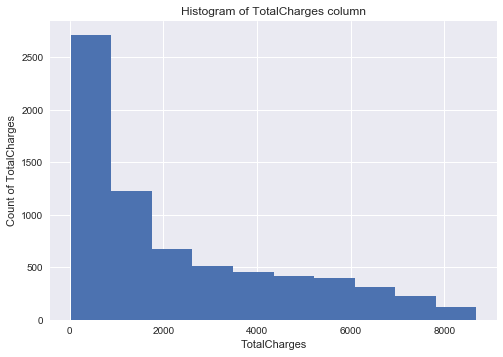

In [16]:
# Check the distribution of TotalCharges column using histogram
df['TotalCharges'].hist()
plt.xlabel('TotalCharges')
plt.ylabel('Count of TotalCharges')
plt.title('Histogram of TotalCharges column')
plt.show()

In [17]:
# Because the distribution of TotalColumn is right skewed, the missing values imputed with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)

In [18]:
df['TotalCharges'].isnull().sum()

0

In [19]:
df.select_dtypes(['integer', 'float']).describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


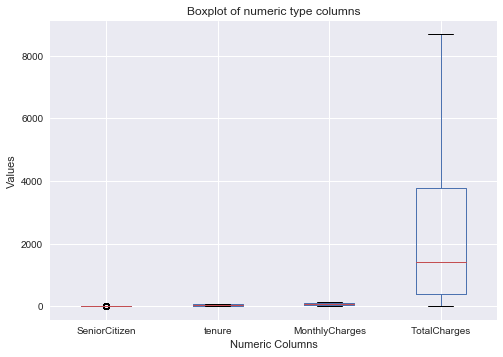

In [20]:
# Check the range of each numeric type columns using boxplot
df.select_dtypes(['integer', 'float']).boxplot()
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.title('Boxplot of numeric type columns')
plt.show()

In [21]:
df.select_dtypes(['object']).describe()

,customerID,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5550-VFRLC,Germany,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,6761,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [22]:
# Drop customerID column
df.select_dtypes(['object']).drop('customerID', axis = 1).head()

,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,France,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,France,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,France,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,France,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,France,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [23]:
df.select_dtypes(['object']).describe().shape

(4, 18)

In [24]:
df.select_dtypes(['object']).drop('customerID', axis = 1).head().shape

(5, 17)

In [25]:
list(df.select_dtypes(['object']).drop('customerID', axis = 1))

['Region',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [26]:
df.select_dtypes(['object']).drop('customerID', axis = 1).describe()

,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Germany,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,6761,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [27]:
# One-hot encoded of the categorical columns
one_hot_df = pd.get_dummies(df.select_dtypes(['object']).drop('customerID', axis = 1), prefix = list(df.select_dtypes(['object']).drop('customerID', axis = 1)))
one_hot_df

,Region_England,Region_France,Region_Germany,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [28]:
# Combine numerical columns with categorical one-hot encoded columns
new_df = pd.concat((df.select_dtypes(['integer', 'float']), one_hot_df), axis = 1)
new_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Region_England,Region_France,Region_Germany,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [29]:
# Select the independent variable (X) from the columns
x = new_df.iloc[:, 0:48]
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Region_England,Region_France,Region_Germany,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [30]:
# Select the target or dependent variable (Y) from the columns
y = new_df.iloc[:,49]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8

In [31]:
y.value_counts(normalize = True)

0    0.73463
1    0.26537
Name: Churn_Yes, dtype: float64

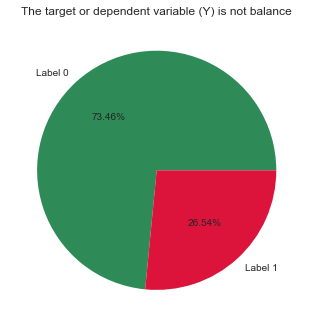

In [32]:
plt.pie(y.value_counts(), labels = ['Label 0', 'Label 1'], autopct = '%0.2f%%', colors = ['seagreen', 'crimson'])
plt.title('The target or dependent variable (Y) is not balance')
plt.show()

## Data Preprocessing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Splitting data set to train and test first before do the preprocessing to avoid data leak
# Splitting data set using stratify random sampling because the target or dependent variable (Y) is not balance
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11, stratify=y)

In [35]:
x_train_raw.shape[0], x_test_raw.shape[0]

(5634, 1409)

In [36]:
# Preprocessing using Min Max Normalization so the data range become [0, 1] and does not affect the one-hot encoded column
minmax = MinMaxScaler()

In [37]:
x_train = minmax.fit_transform(x_train_raw)
x_test = minmax.transform(x_test_raw)

In [38]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.162584,0.446939,0.464755,0.260688,0.012957,0.027689,0.959354,0.490770,0.509230,0.514909,0.485091,0.699503,0.300497,0.094427,0.905573,0.487043,0.094427,0.418530,0.346645,0.439652,0.213703,0.500355,0.213703,0.285942,0.439475,0.213703,0.346823,0.443024,0.213703,0.343273,0.492368,0.213703,0.293930,0.395811,0.213703,0.390486,0.397409,0.213703,0.388889,0.550941,0.212993,0.236067,0.407881,0.592119,0.219027,0.216542,0.334398,0.230032
std,0.369019,0.341800,0.298599,0.261525,0.113099,0.164095,0.197486,0.499959,0.499959,0.499822,0.499822,0.458515,0.458515,0.292447,0.292447,0.499876,0.292447,0.493362,0.475944,0.496389,0.409956,0.500044,0.409956,0.451902,0.496367,0.409956,0.476001,0.496787,0.409956,0.474844,0.499986,0.409956,0.455601,0.489068,0.409956,0.487903,0.489405,0.409956,0.487541,0.497442,0.409459,0.424701,0.491484,0.491484,0.413624,0.411925,0.471822,0.420890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.125000,0.181965,0.042811,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.402778,0.518905,0.158453,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.763889,0.712438,0.433763,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


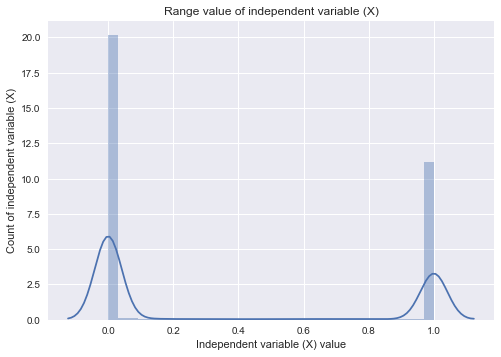

In [39]:
sns.distplot(x_train)
plt.xlabel('Independent variable (X) value')
plt.ylabel('Count of independent variable (X)')
plt.title('Range value of independent variable (X)')
plt.show()

In [40]:
# Check the proporsion of y train
y_train.value_counts(normalize = True)

0    0.734647
1    0.265353
Name: Churn_Yes, dtype: float64

In [41]:
# Check the proporsion of y test
y_test.value_counts(normalize = True)

0    0.734564
1    0.265436
Name: Churn_Yes, dtype: float64

## Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Logistic Regression

In [43]:
log_reg = LogisticRegression(max_iter=1000)

In [44]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_train_predict_log_reg = log_reg.predict(x_train)
y_test_predict_log_reg = log_reg.predict(x_test)

In [46]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_log_reg)

array([[3720,  419],
       [ 675,  820]], dtype=int64)

In [47]:
# Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_log_reg)

array([[926, 109],
       [176, 198]], dtype=int64)

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict_log_reg).ravel()
(tn, fp, fn, tp)

(926, 109, 176, 198)

In [49]:
def confusion_matrix_table(y_true, y_pred):
    conf_mat_table = pd.DataFrame(confusion_matrix(y_true, y_pred))
    conf_mat_table.index.name = 'True'
    conf_mat_table.columns.name = 'Predicted'
    return conf_mat_table

In [50]:
confusion_matrix_table(y_test, y_test_predict_log_reg)

Predicted,0,1
True,,
0,926,109
1,176,198


In [51]:
def all_performance(y_true, y_pred):
    confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = sensitivity
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, sensitivity, specificity, precision, recall, f1_score

In [52]:
def print_all_performance(performance_metric):
    print('Accuracy    : ', round(performance_metric[0], 4))
    print('Sensitivity : ', round(performance_metric[1], 4))
    print('Specificty  : ', round(performance_metric[2], 4))
    print('Precision   : ', round(performance_metric[3], 4))
    print('Recall      : ', round(performance_metric[4], 4))
    print('F1_Score    : ', round(performance_metric[5], 4))

In [53]:
perf_metric_log_reg = all_performance(y_test, y_test_predict_log_reg)
print_all_performance(perf_metric_log_reg)

Accuracy    :  0.7977
Sensitivity :  0.5294
Specificty  :  0.8947
Precision   :  0.645
Recall      :  0.5294
F1_Score    :  0.5815


In [54]:
print(classification_report(y_test, y_test_predict_log_reg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC(kernel='rbf')

In [57]:
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_train_predict_svm = svm.predict(x_train)
y_test_predict_svm = svm.predict(x_test)

In [59]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_svm)

array([[3815,  324],
       [ 695,  800]], dtype=int64)

In [60]:
# Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_svm)

array([[935, 100],
       [201, 173]], dtype=int64)

In [61]:
confusion_matrix_table(y_test, y_test_predict_svm)

Predicted,0,1
True,,
0,935,100
1,201,173


In [62]:
perf_metric_svm = all_performance(y_test, y_test_predict_svm)
print_all_performance(perf_metric_svm)

Accuracy    :  0.7864
Sensitivity :  0.4626
Specificty  :  0.9034
Precision   :  0.6337
Recall      :  0.4626
F1_Score    :  0.5348


In [63]:
print(classification_report(y_test, y_test_predict_svm))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(splitter='best')

In [66]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
y_train_predict_dt = dt.predict(x_train)
y_test_predict_dt = dt.predict(x_test)

In [68]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_dt)

array([[4139,    0],
       [  13, 1482]], dtype=int64)

In [69]:
# Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_dt)

array([[834, 201],
       [190, 184]], dtype=int64)

In [70]:
confusion_matrix_table(y_test, y_test_predict_dt)

Predicted,0,1
True,,
0,834,201
1,190,184


In [71]:
perf_metric_dt = all_performance(y_test, y_test_predict_dt)
print_all_performance(perf_metric_dt)

Accuracy    :  0.7225
Sensitivity :  0.492
Specificty  :  0.8058
Precision   :  0.4779
Recall      :  0.492
F1_Score    :  0.4848


In [72]:
print(classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.48      0.49      0.48       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



### Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()

In [75]:
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
y_train_predict_nb = nb.predict(x_train)
y_test_predict_nb = nb.predict(x_test)

In [77]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_nb)

array([[2684, 1455],
       [ 242, 1253]], dtype=int64)

In [78]:
# Confusion matrix for test data
confusion_matrix(y_test, y_test_predict_nb)

array([[682, 353],
       [ 57, 317]], dtype=int64)

In [79]:
confusion_matrix_table(y_test, y_test_predict_nb)

Predicted,0,1
True,,
0,682,353
1,57,317


In [80]:
perf_metric_nb = all_performance(y_test, y_test_predict_nb)
print_all_performance(perf_metric_nb)

Accuracy    :  0.709
Sensitivity :  0.8476
Specificty  :  0.6589
Precision   :  0.4731
Recall      :  0.8476
F1_Score    :  0.6073


In [81]:
print(classification_report(y_test, y_test_predict_nb))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1035
           1       0.47      0.85      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409



### k-Nearest Neighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

In [84]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
y_train_predict_knn = knn.predict(x_train)
y_test_predict_knn = knn.predict(x_test)

In [86]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_knn)

array([[3726,  413],
       [ 537,  958]], dtype=int64)

In [87]:
# Confusion matrix for training data
confusion_matrix(y_test, y_test_predict_knn)

array([[880, 155],
       [192, 182]], dtype=int64)

In [88]:
confusion_matrix_table(y_test, y_test_predict_knn)

Predicted,0,1
True,,
0,880,155
1,192,182


In [89]:
perf_metric_knn = all_performance(y_test, y_test_predict_knn)
print_all_performance(perf_metric_knn)

Accuracy    :  0.7537
Sensitivity :  0.4866
Specificty  :  0.8502
Precision   :  0.5401
Recall      :  0.4866
F1_Score    :  0.512


In [90]:
print(classification_report(y_train, y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4139
           1       0.70      0.64      0.67      1495

    accuracy                           0.83      5634
   macro avg       0.79      0.77      0.78      5634
weighted avg       0.83      0.83      0.83      5634



In [91]:
print(classification_report(y_test, y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1035
           1       0.54      0.49      0.51       374

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators = 100)

In [94]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
y_train_predict_rf = rf.predict(x_train)
y_test_predict_rf = rf.predict(x_test)

In [96]:
# Confusion matrix for training data
confusion_matrix(y_train, y_train_predict_rf)

array([[4132,    7],
       [   6, 1489]], dtype=int64)

In [97]:
# Confusion matrix for training data
confusion_matrix(y_test, y_test_predict_rf)

array([[942,  93],
       [210, 164]], dtype=int64)

In [98]:
confusion_matrix_table(y_test, y_test_predict_rf)

Predicted,0,1
True,,
0,942,93
1,210,164


In [99]:
cm = pd.DataFrame(confusion_matrix(y_test, y_test_predict_rf))
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,0,1
True,,
0,942,93
1,210,164


In [100]:
perf_metric_rf = all_performance(y_test, y_test_predict_rf)
print_all_performance(perf_metric_rf)

Accuracy    :  0.785
Sensitivity :  0.4385
Specificty  :  0.9101
Precision   :  0.6381
Recall      :  0.4385
F1_Score    :  0.5198


In [101]:
print(classification_report(y_test, y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.44      0.52       374

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



## Model Comparison

In [102]:
compare = {'Metrics' : ['Accuracy' , 'Sensitivity', 'Specificty', 'Precision', 'Recall', 'F1-Score'],
           'Logistic_Regression' : [perf_metric_log_reg[0], perf_metric_log_reg[1], perf_metric_log_reg[2], perf_metric_log_reg[3], perf_metric_log_reg[4], perf_metric_log_reg[5]],
           'SVM' : [perf_metric_svm[0], perf_metric_svm[1], perf_metric_svm[2], perf_metric_svm[3], perf_metric_svm[4], perf_metric_svm[5]],
           'Decision_Tree' : [perf_metric_dt[0], perf_metric_dt[1], perf_metric_dt[2], perf_metric_dt[3], perf_metric_dt[4], perf_metric_dt[5]],
           'Naive_Bayes' : [perf_metric_nb[0], perf_metric_nb[1], perf_metric_nb[2], perf_metric_nb[3], perf_metric_nb[4], perf_metric_nb[5]],
           'k-NN' : [perf_metric_knn[0], perf_metric_knn[1], perf_metric_knn[2], perf_metric_knn[3], perf_metric_knn[4], perf_metric_knn[5]],
           'Random_Forest' : [perf_metric_rf[0], perf_metric_rf[1], perf_metric_rf[2], perf_metric_rf[3], perf_metric_rf[4], perf_metric_rf[5]]}

In [103]:
round(pd.DataFrame(compare), 4)

,Metrics,Logistic_Regression,SVM,Decision_Tree,Naive_Bayes,k-NN,Random_Forest
0,Accuracy,0.7977,0.7864,0.7225,0.7090,0.7537,0.7850
1,Sensitivity,0.5294,0.4626,0.4920,0.8476,0.4866,0.4385
2,Specificty,0.8947,0.9034,0.8058,0.6589,0.8502,0.9101
3,Precision,0.6450,0.6337,0.4779,0.4731,0.5401,0.6381
4,Recall,0.5294,0.4626,0.4920,0.8476,0.4866,0.4385
5,F1-Score,0.5815,0.5348,0.4848,0.6073,0.5120,0.5198
